In [4]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

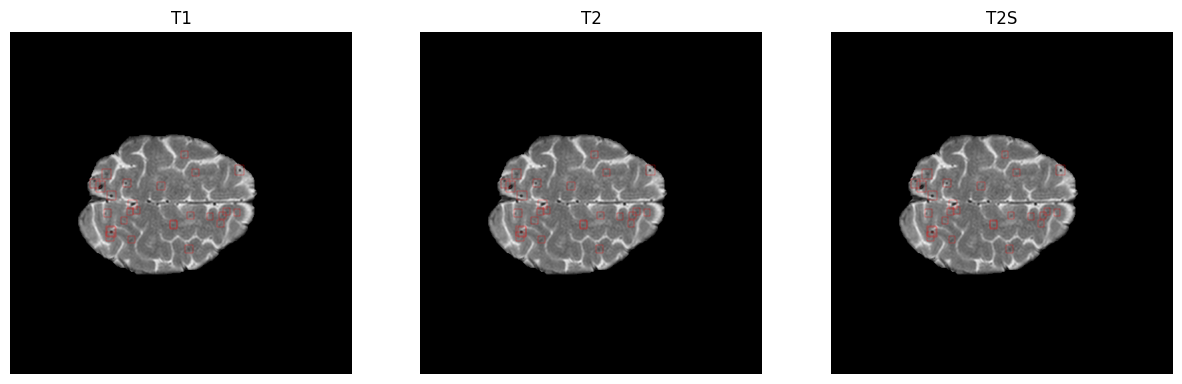

In [ ]:
# Load the YOLO output
yolo_output = [
      {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [278.793, 238.157, 6.798, 7.067], "score": 0.11191}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [202.317, 256.347, 6.593, 7.568], "score": 0.07698}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [251.063, 318.638, 6.89, 7.353], "score": 0.06371}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [209.518, 165.876, 6.736, 7.336], "score": 0.05197}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [153.743, 288.132, 5.471, 6.618], "score": 0.02794}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [107.019, 168.169, 7.328, 7.655], "score": 0.01655}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [179.008, 191.344, 7.075, 7.792], "score": 0.01206}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [266.077, 301.953, 7.284, 7.567], "score": 0.00877}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [184.164, 290.114, 5.574, 6.221], "score": 0.00649}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [279.655, 165.241, 10.537, 10.627], "score": 0.00531}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [298.24, 184.361, 6.571, 6.955], "score": 0.00383}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [160.824, 342.332, 6.53, 7.255], "score": 0.0031}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [103.842, 271.413, 5.357, 6.229], "score": 0.00281}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [249.809, 327.659, 6.548, 8.185], "score": 0.00239}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [233.316, 335.596, 6.197, 7.109], "score": 0.0022}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [109.102, 168.288, 7.866, 7.547], "score": 0.00183}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [271.562, 151.587, 9.647, 10.737], "score": 0.00179}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [162.193, 166.232, 6.082, 6.789], "score": 0.00152}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [191.256, 325.813, 6.838, 7.207], "score": 0.00135}, {"image_id": "sub-217_slice_087", "category_id": 1, "bbox": [290.63, 324.256, 8.268, 9.321], "score": 0.0012}
]

# Root path of the images
root_path = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_t2s_cmb_slice_only_train_small_patch_dropped/images/val'

# Function to visualize the image with bounding boxes on separate channels
def visualize_image_with_bboxes(image_id, bboxes):
    image_path = os.path.join(root_path, f"{image_id}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Separate the channels
    red_channel = image_array[:, :]
    green_channel = image_array[:, :]
    blue_channel = image_array[:, :]

    # Plot the channels with bounding boxes
    plt.figure(figsize=(15, 5))

    for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues'], ['T1', 'T2', 'T2S'])):
        plt.subplot(1, 3, i + 1)
        plt.imshow(channel, cmap='gray')
        for bbox in bboxes:
            x, y, width, height = bbox
            # Increase the size of the bounding box
            rect = plt.Rectangle((x - 2, y - 2), width + 4, height + 4, edgecolor='red', facecolor='none', linewidth=0.2)
            plt.gca().add_patch(rect)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Group bounding boxes by image_id
bboxes_by_image = {}
for item in yolo_output:
    image_id = item['image_id']
    bbox = item['bbox']
    if image_id not in bboxes_by_image:
        bboxes_by_image[image_id] = []
    bboxes_by_image[image_id].append(bbox)

# Visualize each image with its bounding boxes on separate channels
for image_id, bboxes in bboxes_by_image.items():
    visualize_image_with_bboxes(image_id, bboxes)

In [6]:
def find_nonempty_text_files(directory):
    """
    Find all non-empty .txt files in a directory
    Returns a list of file names
    """
    nonempty_files = []
    dir_path = Path(directory)
    
    # Find all .txt files
    for txt_file in dir_path.glob("*.txt"):
        # Check if file is not empty
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)
    
    return sorted(nonempty_files)  # Sort alphabetically

task = "val"
directory = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG/labels/val'
# directory = f"{root_path}/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    print(f"- {filename}")

Found 38 non-empty text files:
- sub-103_slice_005.txt
- sub-103_slice_017.txt
- sub-103_slice_018.txt
- sub-103_slice_019.txt
- sub-103_slice_020.txt
- sub-103_slice_021.txt
- sub-110_slice_011.txt
- sub-110_slice_014.txt
- sub-110_slice_018.txt
- sub-110_slice_019.txt
- sub-110_slice_020.txt
- sub-110_slice_021.txt
- sub-110_slice_022.txt
- sub-110_slice_023.txt
- sub-110_slice_024.txt
- sub-110_slice_025.txt
- sub-110_slice_026.txt
- sub-110_slice_027.txt
- sub-110_slice_028.txt
- sub-110_slice_029.txt
- sub-110_slice_030.txt
- sub-110_slice_031.txt
- sub-110_slice_032.txt
- sub-111_slice_009.txt
- sub-111_slice_018.txt
- sub-111_slice_019.txt
- sub-111_slice_020.txt
- sub-217_slice_086.txt
- sub-217_slice_087.txt
- sub-217_slice_088.txt
- sub-217_slice_089.txt
- sub-232_slice_109.txt
- sub-232_slice_110.txt
- sub-308_slice_009.txt
- sub-308_slice_010.txt
- sub-317_slice_031.txt
- sub-321_slice_018.txt
- sub-321_slice_019.txt
